In [20]:
#importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#extracting the dataset

df = pd.read_csv('raw_sales.csv')

In [22]:
#Display the first few rows to peek at the data

print("First few rows of the dataset:")
display(df.head(10))

First few rows of the dataset:


,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
5,2007-04-04 00:00:00,2905,465000,house,4
6,2007-04-24 00:00:00,2607,399000,house,3
7,2007-04-30 00:00:00,2606,1530000,house,4
8,2007-05-24 00:00:00,2902,359000,house,3
9,2007-05-25 00:00:00,2906,320000,house,3


In [23]:
#Display the last few rows to peek at the data

print("Last few rows of the dataset:")
display(df.tail(10))

Last few rows of the dataset:


,datesold,postcode,price,propertyType,bedrooms
29570,2019-07-25 00:00:00,2620,172500,unit,1
29571,2019-07-25 00:00:00,2603,297500,unit,2
29572,2019-07-25 00:00:00,2606,321000,unit,1
29573,2019-07-25 00:00:00,2603,380000,unit,1
29574,2019-07-25 00:00:00,2612,475000,unit,2
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [24]:
#Print the summary statistics

print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [25]:
#Filter data for a specific year


df['datesold'] = pd.to_datetime(df['datesold'])

# Define the date range or a specific date to filter
start_date = '2019-01-01'
end_date = '2019-12-31'

# Filter the DataFrame
filtered_df = df[(df['datesold'] >= start_date) & (df['datesold'] <= end_date)]

# Display the filtered DataFrame
print(filtered_df)

        datesold  postcode   price propertyType  bedrooms
23530 2019-01-01      2904  591200        house         4
23531 2019-01-05      2913  550000        house         3
23532 2019-01-07      2914  468000        house         3
23533 2019-01-07      2913  980000        house         5
23534 2019-01-08      2615  460000        house         3
...          ...       ...     ...          ...       ...
29575 2019-07-25      2900  500000         unit         3
29576 2019-07-25      2612  560000         unit         2
29577 2019-07-26      2912  464950         unit         2
29578 2019-07-26      2601  589000         unit         2
29579 2019-07-26      2612  775000         unit         2

[1385 rows x 5 columns]


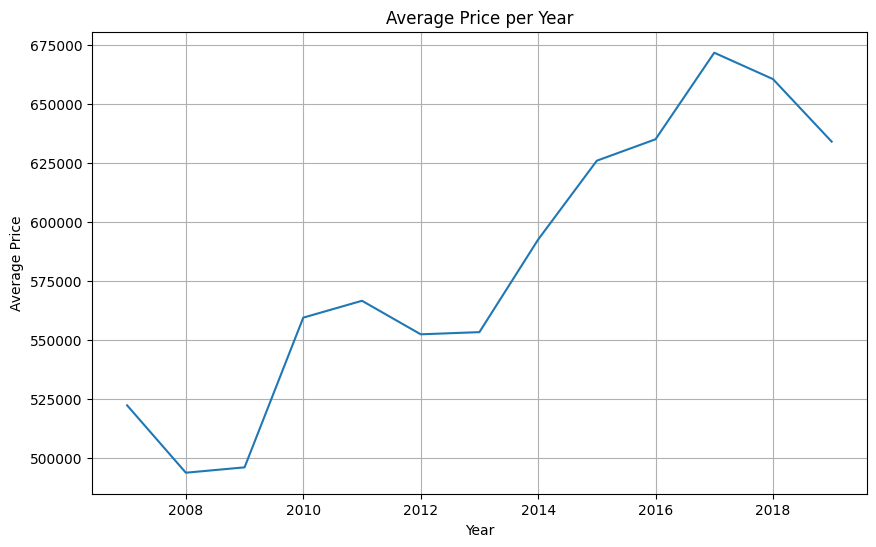

In [26]:
#Plot the average price per year

df['year'] = df['datesold'].dt.year

# Calculate average price per year
average_price_per_year = df.groupby('year')['price'].mean()

# Plotting the average price per year
average_price_per_year.plot(kind='line', figsize=(10, 6), title='Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [27]:
#Count of properties sold per year

df['datesold'] = pd.to_datetime(df['datesold'])

# Extract the year from 'datesold'
df['year'] = df['datesold'].dt.year

# Calculate unique properties sold per year
properties_sold_per_year = df.groupby('year')['propertyType'].nunique()

# Print the result
print("Properties sold per year:")
print(properties_sold_per_year)

Properties sold per year:
year
2007    2
2008    2
2009    2
2010    2
2011    2
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
2019    2
Name: propertyType, dtype: int64


In [28]:
#Query for a specific date range (e.g., Jan 2010 to Dec 2015)

df['datesold'] = pd.to_datetime(df['datesold'])

# Query for a specific date range
start_date = '2010-01-01'
end_date = '2015-12-31'
date_range_data = df[(df['datesold'] >= start_date) & (df['datesold'] <= end_date)]

# Print the result
print(f"Data for the date range {start_date} to {end_date}:")
display(date_range_data)

Data for the date range 2010-01-01 to 2015-12-31:


,datesold,postcode,price,propertyType,bedrooms,year
1957,2010-01-04,2615,435000,house,3,2010
1958,2010-01-05,2904,712000,house,4,2010
1959,2010-01-06,2617,435000,house,4,2010
1960,2010-01-06,2606,1350000,house,5,2010
1961,2010-01-07,2905,612500,house,4,2010
...,...,...,...,...,...,...
26612,2015-12-23,2603,415000,unit,2,2015
26613,2015-12-23,2612,438000,unit,2,2015
26614,2015-12-23,2612,450000,unit,2,2015
26615,2015-12-23,2605,515000,unit,2,2015


In [29]:
# Calculate the mean price month-wise (use Groupby)

df['datesold'] = pd.to_datetime(df['datesold'])

# Extract the month from 'datesold' and add it to the DataFrame
df['month'] = df['datesold'].dt.month

# Calculate the mean price per month
mean_price_month = df.groupby('month')['price'].mean()

# Print the result
print("Mean price per month:")
display(mean_price_month)

Mean price per month:


month
1     556812.934816
2     604714.174322
3     624162.017373
4     615371.905186
5     613112.762603
6     602028.727067
7     588337.742666
8     584237.228489
9     611577.791719
10    611372.174647
11    647936.112186
12    618168.901316
Name: price, dtype: float64

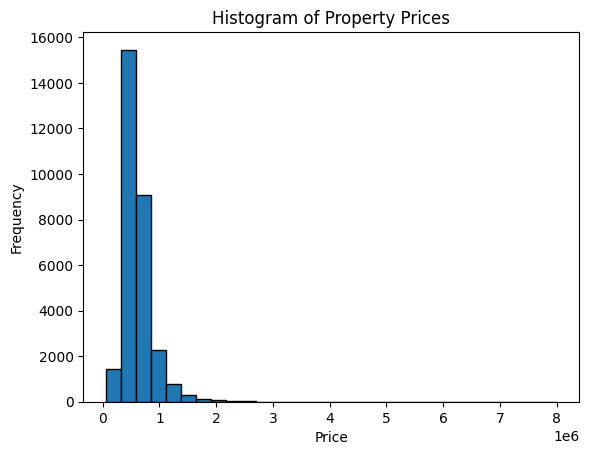

In [30]:
# Perform a histogram plot

plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Property Prices')
plt.show()

In [31]:
# Print the property price > 5Lakhs 

high_price_properties = df[df['price'] > 500000]
print("Properties with price greater than 5 Lakhs:")
display(high_price_properties)

Properties with price greater than 5 Lakhs:


,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2
7,2007-04-30,2606,1530000,house,4,2007,4
12,2007-06-27,2612,850000,house,4,2007,6
13,2007-06-28,2904,765000,house,4,2007,6
14,2007-06-30,2615,517000,house,4,2007,6
...,...,...,...,...,...,...,...
29567,2019-07-23,2912,549950,unit,3,2019,7
29569,2019-07-24,2601,590000,unit,1,2019,7
29576,2019-07-25,2612,560000,unit,2,2019,7
29578,2019-07-26,2601,589000,unit,2,2019,7
